# Accuracy

**accuracy** - Точность модели - Доля правильных ответов. \
Идеальное значение - единица, худшее - ноль.\
Количество угаданных предсказаний деленное на количество образцов.
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

Метрика не подходит для задач, где присутствует дисбаланс классов. 

И для задач где ошибки имеют разную цену


In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier()
model.fit(X, y)

y_pred = model.predict(X)

In [28]:
import pandas as pd
df = pd.DataFrame({'y_true': y,
                  'y_pred': y_pred})
df['right'] = df['y_true'] == df['y_pred']
df

,y_true,y_pred,right
0,1,1,True
1,1,1,True
2,0,0,True
3,0,0,True
4,0,0,True
5,1,1,True
6,0,0,True
7,1,1,True
8,1,0,False
9,0,0,True


In [30]:
df['right'].sum() / len(df)

0.9

## Sklearn

In [1]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y, y_pred)

0.9

# PRECISION, RECALL, CONFUSION MATRIX

`True Positive`\
`False Positive`\
`True Negative`\
`False Negative`\
`Precision` : Точность. Доля истинных срабатываний от общего количества срабатываний. Показывает насколько можно доверять алгоритму в случаи срабатывания. (*Доля правильных назначений целевого класса ко всем назначением целевого класса*)

`Recall` : Полнота. Доля объектов истинно относящихся к первому классу к общему количеству объектов целевого класса

`Accuracy score`: Можно выразить из этой же матрицы
$$precision(a, X) = \frac{TP}{TP+FP}.$$
$$recall(a, X) = \frac{TP}{TP+FN},$$
$$accuracy(a, X) = \frac{TP+TN}{TP+FP+FN+TN},$$

In [5]:
import numpy as np
import pandas as pd

In [6]:
clients = [0,0,0,0,0,1,1,1,1,1]
first_model_pred = [0, 0, 1, 1, 1,1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
df = pd.DataFrame({'clients':clients,
                  'first_model': first_model_pred,
                  'second_model':second_model_pred})
df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


In [7]:
df['first_model_right']= df['clients']==df['first_model']
df['second_model_right']=df['clients']==df['second_model']

In [8]:
df

,clients,first_model,second_model,first_model_right,second_model_right
0,0,0,0,True,True
1,0,0,0,True,True
2,0,1,0,False,True
3,0,1,0,False,True
4,0,1,0,False,True
5,1,1,1,True,True
6,1,1,1,True,True
7,1,1,0,True,False
8,1,1,0,True,False
9,1,1,0,True,False


False Positive(Ложное срабатывание) - Модель выдала кредит тем людям кому не следовало. (Назначила 1 клас людям, у кого он должен быть 0ым)

In [9]:
df[df['first_model_right']==False][['clients','first_model']]

,clients,first_model
2,0,1
3,0,1
4,0,1


In [10]:
# Для второй
df.query('clients==0 and second_model==1')[['clients','second_model']]

,clients,second_model


False Negative(Ложный пропуск) - Модель НЕ выдала кредит тем людям, кому должна была выдать(Назначила 0 класс, людям у кого он должен быть 1ым)

In [11]:
df[df['second_model_right']==False][['clients','second_model']]

,clients,second_model
7,1,0
8,1,0
9,1,0


True Positive - Модель выдала кредит тем людям кому и должна была выдать. (Назначила 1 класс людям у кого он и должен быть первым)

In [12]:
df.query('second_model_right == True and clients==1')[['clients', 'second_model']]

,clients,second_model
5,1,1
6,1,1


True Negative(Истинный пропуск) - Модель не выдала кредит тому кому и не должна была выдовать кредит(Назначила 0 классу, тем людям у кого он и должен быть нулевым)

In [13]:
df.query('second_model_right == True and clients==0')[['clients', 'second_model']]

,clients,second_model
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Confusion Matrix

|  <empty>   | $$y = 0$$ | $$y = 1$$ |
--- | --- | ---
| __$$a(x) = 0$$__  |  True Negative TN    |  False Positive  FP   |
| __$$a(x) = 1$$__ |   False Negative FN    |   True Positive TP   |


In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
conf = confusion_matrix(df['clients'], df['second_model'])
conf

array([[5, 0],
       [3, 2]], dtype=int64)

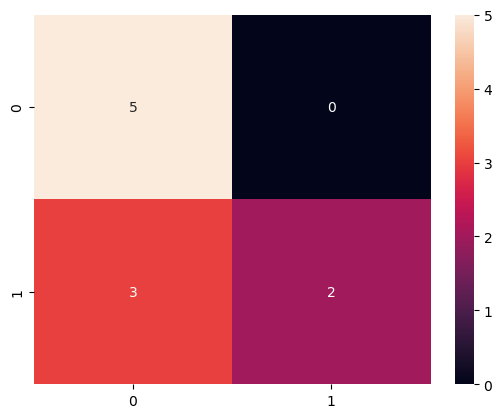

In [16]:
sns.heatmap(conf, annot=True);

In [17]:
(2+5)/(5+0+3+2)

0.7

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(df['clients'], df['second_model'])

0.7

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(df['clients'], df['second_model'])
recall = recall_score(df['clients'], df['second_model'])
precision, recall

(1.0, 0.4)

# F1-Score, Fbeta_score, classification_report

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score